In [1]:
import numpy as np
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex

In [2]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr)

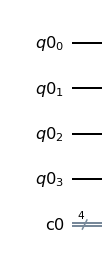

In [3]:
%matplotlib inline
qc.draw(output='mpl')

In [4]:
def make_entanglement(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

In [5]:
def make_communicate(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

<IPython.core.display.Math object>

None

C:\Users\brian\anaconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


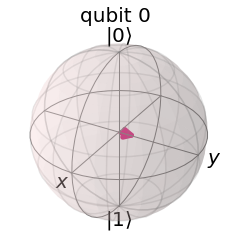

In [6]:
psi = random_state(1)
display(array_to_latex(psi))
plot_bloch_multivector(psi)

In [7]:
init_gate = Initialize(psi)
init_gate.label = "init"

In [8]:
qc.append(init_gate, [0])
qc.barrier()

In [9]:
make_entanglement(qc, 0, 1)
make_entanglement(qc, 2, 3)
qc.barrier()

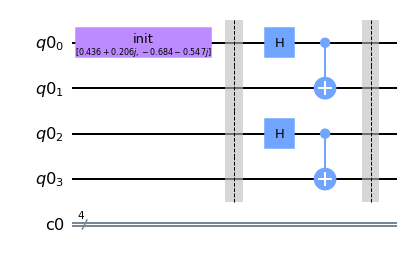

In [10]:
qc.draw(output='mpl')

In [11]:
make_communicate(qc, 1, 2)
qc.barrier()

In [12]:
def measure_pair(qc, a, b):
    qc.measure(a, a)
    qc.measure(b, b)

In [13]:
measure_pair(qc, 1, 2)

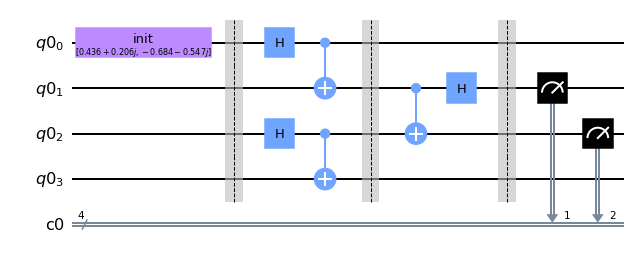

In [14]:
qc.draw(output='mpl')

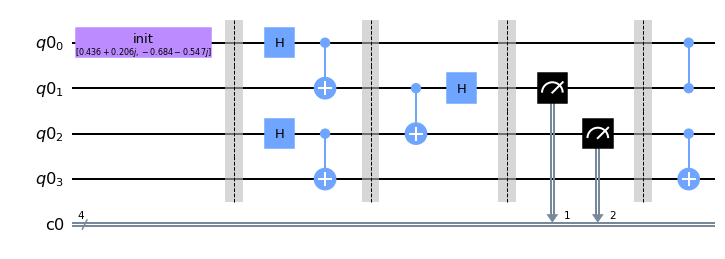

In [15]:
qc.barrier()
qc.cz(1, 0)
qc.cx(2, 3)
qc.draw(output='mpl')

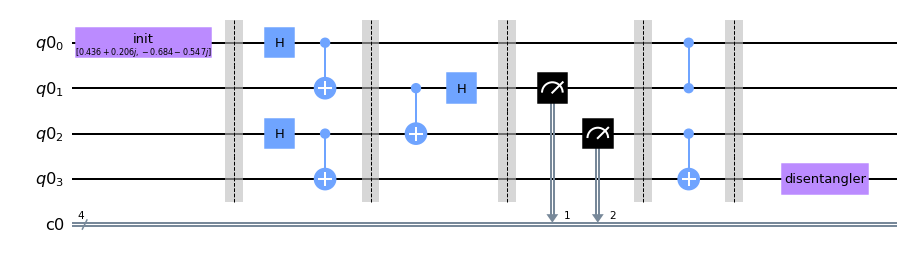

In [16]:
qc.barrier()
inverse_init_gate = init_gate.gates_to_uncompute()
qc.append(inverse_init_gate, [3])
qc.draw(output='mpl')

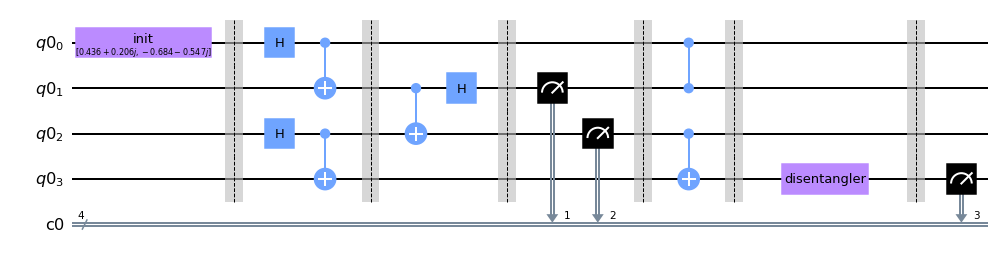

In [17]:
qc.barrier()
qc.measure(3, 3)
qc.draw(output='mpl')

In [18]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator).result()

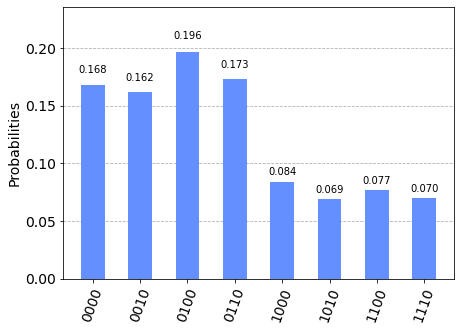

In [19]:
plot_histogram(result.get_counts(qc))

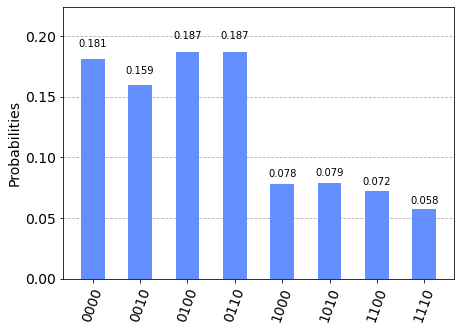

In [20]:
t_qc = transpile(qc, simulator)
t_qc.save_statevector()
counts = simulator.run(t_qc).result().get_counts()
plot_histogram(counts)

In [21]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

In [22]:
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(qc, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run
